In [65]:
import math
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import statsmodels.formula.api as sm
from statsmodels.tsa import tsatools, stattools
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics import tsaplots
import statsmodels.formula.api as sm
from statsmodels.tsa import tsatools
from statsmodels.tsa.holtwinters import ExponentialSmoothing

## Smoothing

- Smoothing is a technique used in statistics to reduce noise and variability in data by creating a simplified representation that still retains the underlying trends or patterns.
- Simple smoothers such as moving average and simple exponential smoother are suitable for series without trend or seasonality.
- Smoothing methods for series with trend and/or seasonality are also discussed, which are data-driven and can adapt to changes over time.
- The user needs to specify smoothing constants that determine how fast the method adapts to new data.

In [66]:
df = pd.read_csv("data_daily.csv")
df

,Date,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM,CO_mg,AQI_calculated,target,station_n
0,2013-03-01,8.625000,16.875000,7.375000,44.573821,870.833333,75.791667,1.691667,1024.816667,-19.691667,0.0,2.350000,0.870833,76.0,4,1
1,2013-03-01,7.541667,12.375000,15.583333,18.731431,362.500000,76.833333,0.016667,1023.783333,-21.941667,0.0,2.933333,0.362500,77.0,4,2
2,2013-03-01,6.416667,9.875000,8.416667,29.443274,416.666667,71.625000,1.325000,1028.783333,-21.466667,0.0,3.308333,0.416667,72.0,4,8
3,2013-03-01,6.375000,12.708333,3.000000,34.634057,204.166667,81.958333,0.812500,1023.858333,-19.583333,0.0,2.133333,0.204167,82.0,4,11
4,2013-03-01,8.041667,10.750000,7.416667,19.609941,350.000000,56.708333,2.062500,1025.904167,-19.708333,0.0,2.608333,0.350000,57.0,4,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17527,2017-02-28,14.875000,32.708333,6.500000,43.871490,570.833333,55.500000,10.958333,1014.887500,-12.783333,0.0,2.058333,0.570833,56.0,4,3
17528,2017-02-28,23.583333,37.541667,4.083333,32.875000,700.000000,64.583333,8.554167,1009.791667,-10.891667,0.0,2.162500,0.700000,65.0,4,2
17529,2017-02-28,13.708333,34.000000,5.708333,28.833333,529.166667,41.791667,9.754167,1011.287500,-13.612500,0.0,2.337500,0.529167,42.0,5,1
17530,2017-02-28,13.125000,22.041667,6.375000,12.276608,412.500000,80.708333,10.187500,1010.116667,-11.704167,0.0,2.350000,0.412500,81.0,4,11


In [67]:
sorted_df = df.sort_values(by=["station_n", "Date"])

In [68]:
sorted_df

,Date,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM,CO_mg,AQI_calculated,target,station_n
0,2013-03-01,8.625000,16.875000,7.375000,44.573821,870.833333,75.791667,1.691667,1024.816667,-19.691667,0.0,2.350000,0.870833,76.0,4,1
19,2013-03-02,36.916667,51.375000,37.291667,38.109941,1479.041667,39.583333,0.820833,1024.900000,-16.337500,0.0,1.087500,1.479042,74.0,4,1
33,2013-03-03,80.333333,120.041667,47.541667,61.746490,2349.708333,33.708333,6.562500,1012.566667,-11.991667,0.0,1.400000,2.349708,168.0,3,1
41,2013-03-04,26.500000,51.291667,18.666667,41.652626,1170.666667,67.250000,9.795833,1015.608333,-11.945833,0.0,1.541667,1.170667,67.0,4,1
59,2013-03-05,136.708333,172.541667,72.291667,60.164175,1341.416667,84.375000,6.750000,1008.883333,-7.741667,0.0,0.841667,1.341417,313.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17477,2017-02-24,20.454545,26.681818,7.590909,36.590909,768.181818,51.545455,4.840909,1021.540909,-11.459091,0.0,2.459091,0.768182,52.0,4,12
17485,2017-02-25,16.458333,25.375000,8.416667,41.833333,587.500000,51.458333,7.141667,1019.400000,-10.145833,0.0,2.416667,0.587500,51.0,4,12
17498,2017-02-26,25.521739,38.434783,12.217391,44.434783,626.086957,51.695652,6.069565,1021.008696,-7.660870,0.0,1.434783,0.626087,52.0,4,12
17516,2017-02-27,73.333333,88.750000,20.375000,83.916667,1487.500000,24.208333,7.329167,1017.841667,-6.620833,0.0,1.629167,1.487500,144.0,3,12


In [69]:
df= sorted_df.head(1450)

In [70]:
df = df[["Date","AQI_calculated"]]

In [71]:
df['Date'] = pd.to_datetime(df.Date)

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1450 entries, 0 to 17390
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            1450 non-null   datetime64[ns]
 1   AQI_calculated  1450 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 34.0 KB


In [73]:
AQI_df= df

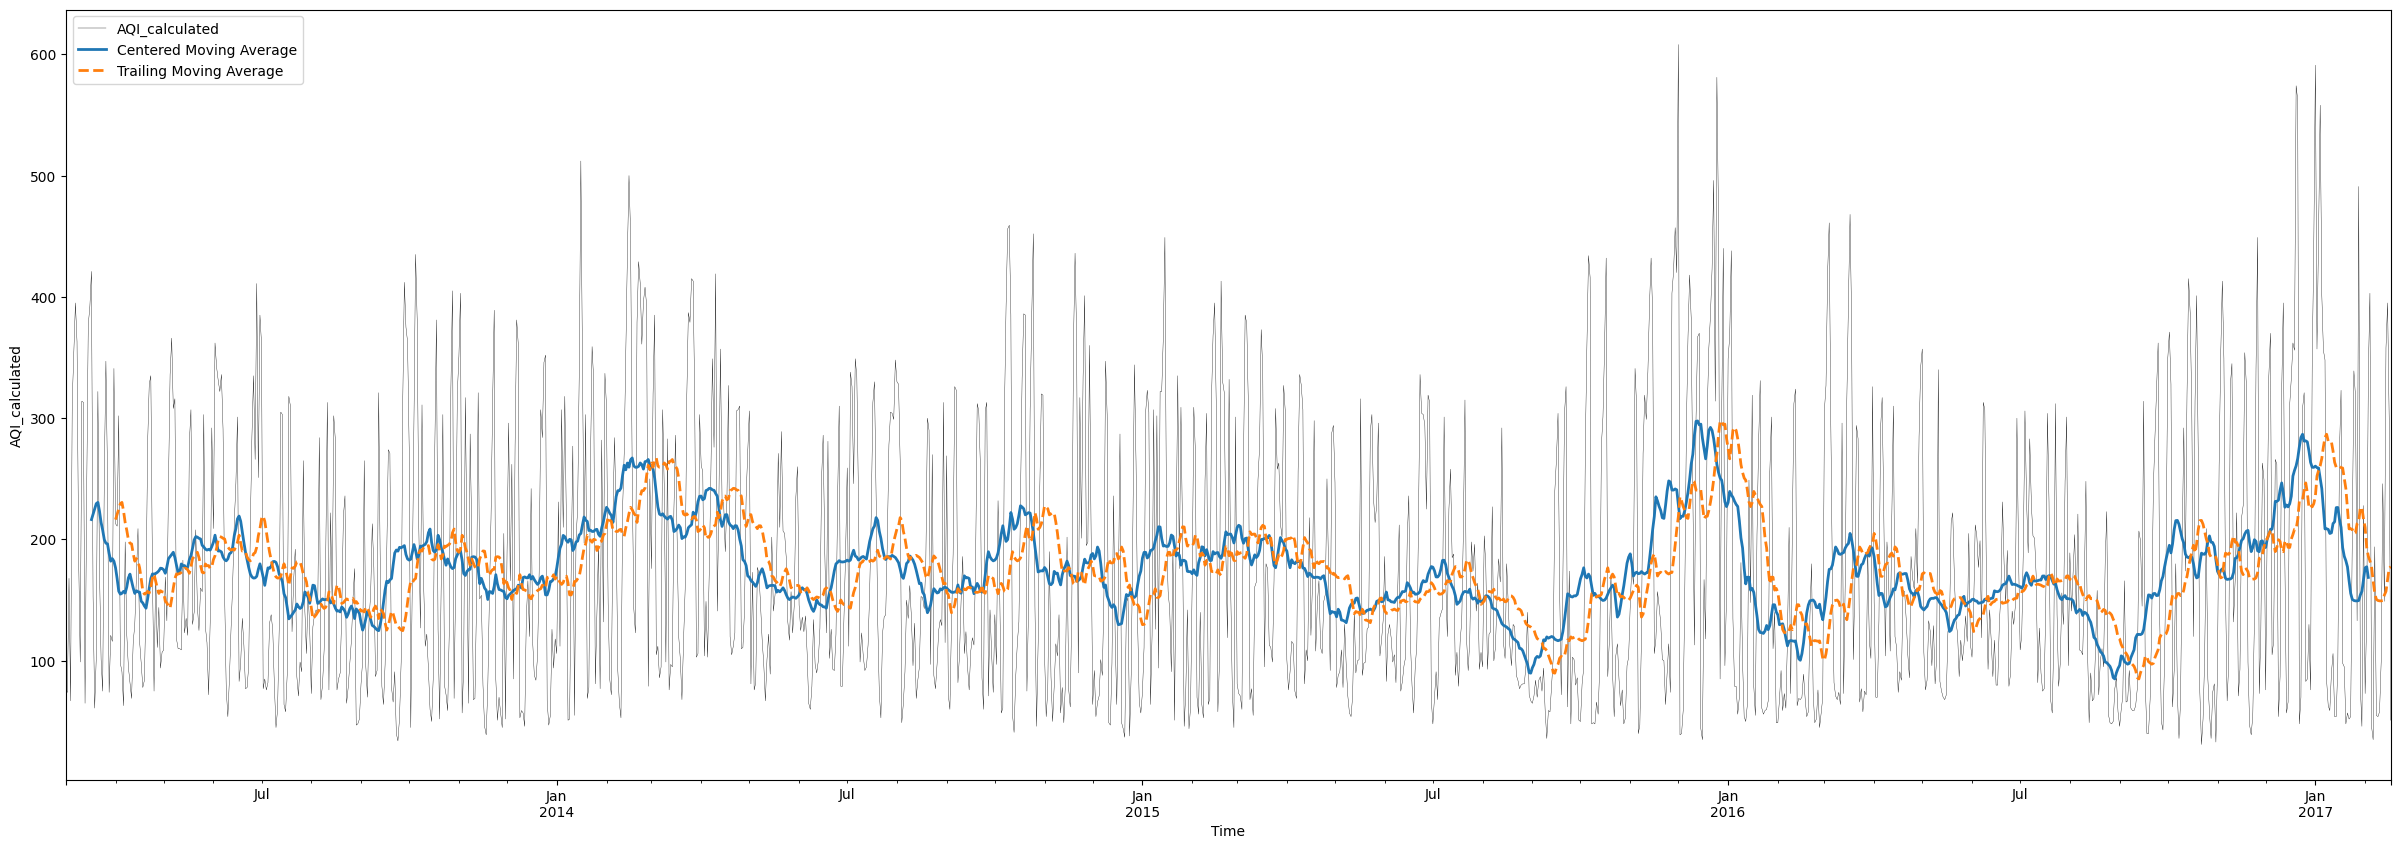

In [74]:
# Load data and convert to time series
AQI_df['Date'] = pd.to_datetime(AQI_df.Date, format='%Y/%m/%d')
AQI_ts = pd.Series(AQI_df.AQI_calculated.values, index=AQI_df.Date, name ="AQI_calculated")
AQI_ts.index = pd.DatetimeIndex(AQI_ts.index,
freq=AQI_ts.index.inferred_freq)
#------------------------------------------------------------------
# centered moving average with window size = 12 (takes 12 points and centered around it)
ma_centered = AQI_ts.rolling(31, center=True).mean()
# trailing moving average with window size = 12
ma_trailing = AQI_ts.rolling(31).mean()
#------------------------------------------------------------------
# shift the average by one time unit to get the next day predictions
ma_centered = pd.Series(ma_centered[:-1].values, index=ma_centered.index[1:])
ma_trailing = pd.Series(ma_trailing[:-1].values, index=ma_trailing.index[1:])
fig, ax = plt.subplots(figsize=(30, 10))
ax = AQI_ts.plot(ax=ax, color='black', linewidth=0.25)
ma_centered.plot(ax=ax, linewidth=2)
ma_trailing.plot(ax=ax, style='--', linewidth=2)
ax.set_xlabel('Time')
ax.set_ylabel('AQI_calculated')
ax.legend(['AQI_calculated', 'Centered Moving Average', 'Trailing Moving Average'])
plt.show()

#Moving Average
- The moving average is a simple smoother that averages values across a window of consecutive periods.
- The window width w is determined by the user.
- There are two types of moving averages: centered and trailing.
- Centered moving averages suppress seasonality and noise, making trends more visible, while trailing moving averages are useful for forecasting.
- The moving average at time t is computed by centering the window around time t and averaging across the w values within the window.
- For a seasonal series, the default choice of w should be the length of a seasonal cycle.


#Trailing Moving Average for Forecasting

- Centered moving averages can't be used for forecasting because the future is typically unknown.
- Trailing moving averages use the most recent available w values of a series to forecast k steps ahead.

In [75]:
AQI_df

,Date,AQI_calculated
0,2013-03-01,76.0
19,2013-03-02,74.0
33,2013-03-03,168.0
41,2013-03-04,67.0
59,2013-03-05,313.0
...,...,...
17341,2017-02-13,149.0
17359,2017-02-14,358.0
17364,2017-02-15,395.0
17387,2017-02-16,299.0


In [76]:
AQI_ts

Date
2013-03-01     76.0
2013-03-02     74.0
2013-03-03    168.0
2013-03-04     67.0
2013-03-05    313.0
              ...  
2017-02-13    149.0
2017-02-14    358.0
2017-02-15    395.0
2017-02-16    299.0
2017-02-17     51.0
Freq: D, Name: AQI_calculated, Length: 1450, dtype: float64

In [77]:
# create the plot
def singleGraphLayout(ax, ylim, train_df, valid_df):
    ax.set_xlim('2013', '2017-5')
    ax.set_ylim(*ylim)
    ax.set_xlabel('Time')
    one_date = pd.Timedelta('31 days')
    xtrain = (min(train_df.index), max(train_df.index) - one_date)
    xvalid = (min(valid_df.index) + one_date, max(valid_df.index) - one_date)
    xtv = xtrain[1] + 0.5 * (xvalid[0] - xtrain[1])
    ypos = 0.9 * ylim[1] + 0.1 * ylim[0]
    ax.add_line(plt.Line2D(xtrain, (ypos, ypos), color='black', linewidth=0.5))
    ax.add_line(plt.Line2D(xvalid, (ypos, ypos), color='black', linewidth=0.5))
    ax.axvline(x=xtv, ymin=0, ymax=1, color='black', linewidth=0.5)
    ypos = 0.925 * ylim[1] + 0.075 * ylim[0]
    ax.text('2013', ypos, 'Training')
    ax.text('2017-5', ypos, 'Validation')

In [78]:
def graphLayout(axes, train_df, valid_df):
    singleGraphLayout(axes[0], [0, 700], train_df, valid_df)
    singleGraphLayout(axes[1], [-550, 550], train_df, valid_df)
    train_df.plot(y='AQI_calculated', ax=axes[0], color='C0', linewidth=0.75)
    valid_df.plot(y='AQI_calculated', ax=axes[0], color='C0', linestyle='dashed', linewidth=0.75)
    axes[1].axhline(y=0, xmin=0, xmax=1, color='black', linewidth=0.5)
    axes[0].set_xlabel('')
    axes[0].set_ylabel('AQI_calculated')
    axes[1].set_ylabel('Forecast Errors')
    if axes[0].get_legend():
        axes[0].get_legend().remove()

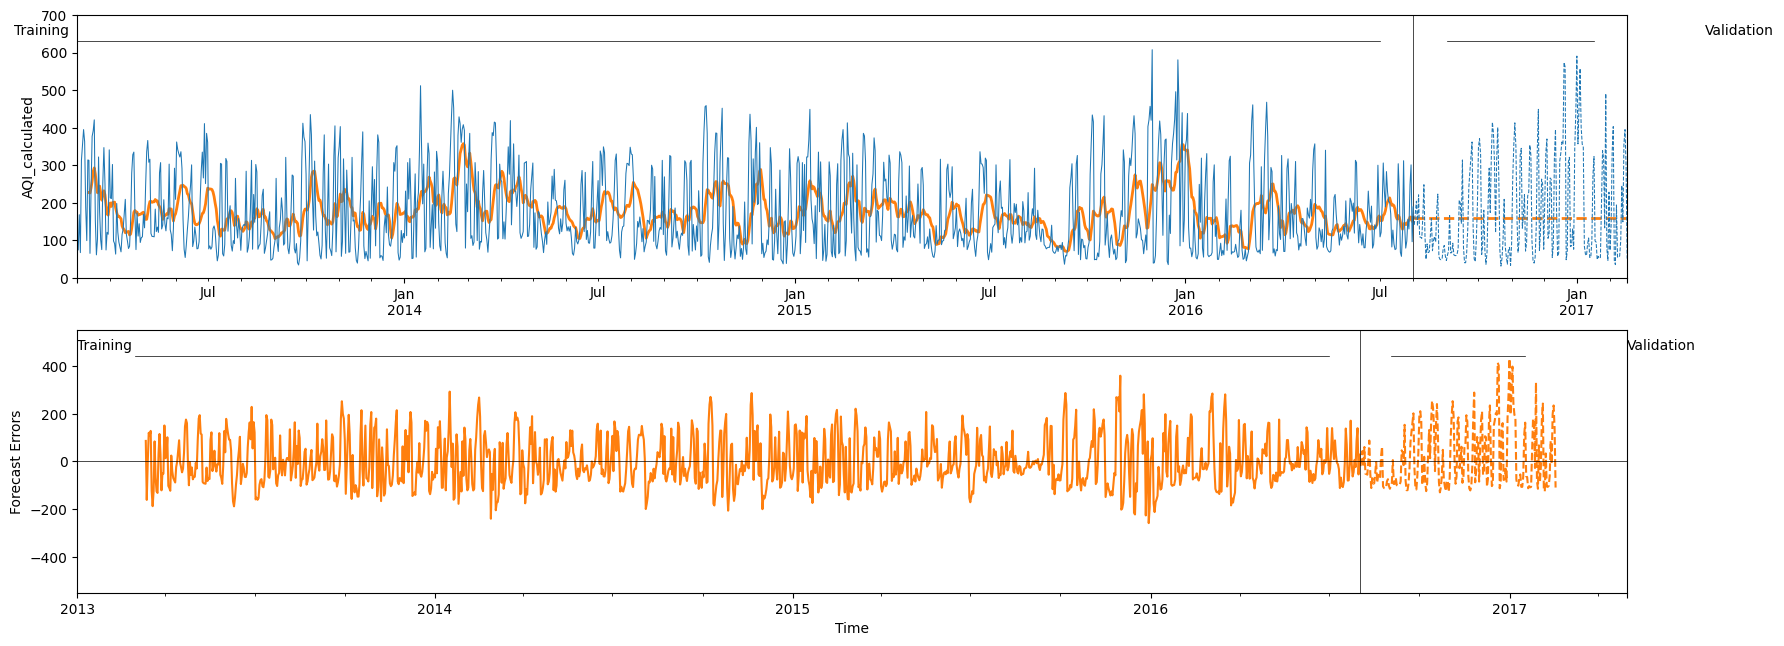

In [79]:
# partition the data
nValid = 200
nTrain = len(AQI_ts) - nValid
train_ts = AQI_ts[:nTrain]
valid_ts = AQI_ts[nTrain:]
# moving average on training
ma_trailing = train_ts.rolling(12).mean()
last_ma = ma_trailing[-1]
# create forecast based on last moving average in the training period
ma_trailing_pred = pd.Series(last_ma, index=valid_ts.index)
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(20, 7.5))
ma_trailing.plot(ax=axes[0], linewidth=2, color='C1')
ma_trailing_pred.plot(ax=axes[0], linewidth=2, color='C1', linestyle='dashed')
residual = train_ts - ma_trailing
residual.plot(ax=axes[1], color='C1')
residual = valid_ts - ma_trailing_pred
residual.plot(ax=axes[1], color='C1', linestyle='dashed')
graphLayout(axes, train_ts, valid_ts)

## Build a model with seasonality, trend, and quadratic trend

In [80]:
# AQI_df= AQI_df.drop(columns =["const", "trend"])

In [81]:
import statsmodels.formula.api as sm

In [82]:
AQI_df = tsatools.add_trend(AQI_ts, trend='ct')
AQI_df['Month'] = AQI_df.index.month
# partition the data
train_df = AQI_df[:nTrain]
valid_df = AQI_df[nTrain:]
formula = 'AQI_calculated ~ trend + np.square(trend) + C(Month)'
AQI_lm_trendseason = sm.ols(formula=formula, data=train_df).fit()
# create single-point forecast
AQI_prediction = AQI_lm_trendseason.predict(valid_df.iloc[0, :])
# apply MA to residuals
ma_trailing = AQI_lm_trendseason.resid.rolling(31).mean()
print('Prediction', AQI_prediction[0])
print('ma_trailing', ma_trailing[-1])

Prediction 120.10485157677036
ma_trailing 19.930957253451087


- Prediction is 120 of Air quality index. 
- ma_trailing is the moving average of the residuals (forecast errors) of your linear regression model. It's calculated using a rolling window of 12 data point


Manual average of 1 month

In [83]:
manual_average = sorted_df["AQI_calculated"].iloc[270:300].mean()
print("Manual Average:", manual_average)

Manual Average: 172.56666666666666


#Simple Exponential Smoothing
- Simple exponential smoothing is a popular and flexible forecasting method.
- It takes a weighted average of all past values, with exponentially decreasing weights.
- It should only be used for series without trend or seasonality, obtained by removing them from raw series.
- The forecast at time t+1 is the sum of the last observation and a weighted sum of all past observations.
- The smoothing parameter
 is a constant between 0 and 1, controlling the weight given to past observations.
- An alternative formulation is to present the exponential forecaster as an "active learner," adjusting the next forecast based on the previous forecast error.
- Forecasting further into the future yields the same forecast as a one-step-ahead forecast, as it relies only on past information.
- The k-step ahead forecast is equal to the one-step-ahead forecast.

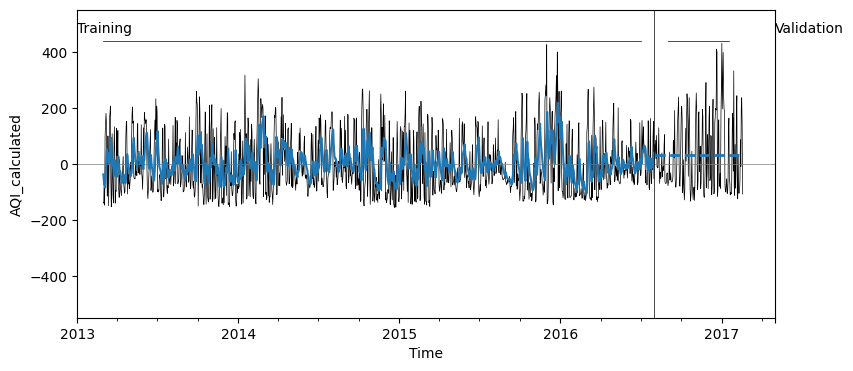

In [85]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

residuals_ts = AQI_lm_trendseason.resid
residuals_pred = valid_df.AQI_calculated - AQI_lm_trendseason.predict(valid_df)
fig, ax = plt.subplots(figsize=(9,4))
AQI_lm_trendseason.resid.plot(ax=ax, color='black', linewidth=0.5)
residuals_pred.plot(ax=ax, color='black', linewidth=0.5)
ax.set_ylabel('AQI_calculated')
ax.set_xlabel('Time')
ax.axhline(y=0, xmin=0, xmax=1, color='grey', linewidth=0.5)
# run exponential smoothing
# with smoothing level alpha = 0.2

expSmooth = ExponentialSmoothing(residuals_ts, freq='D')
expSmoothFit = expSmooth.fit(smoothing_level=0.2)
expSmoothFit.fittedvalues.plot(ax=ax)
expSmoothFit.forecast(len(valid_ts)).plot(ax=ax, style='--', linewidth=2, color='C0')
singleGraphLayout(ax, [-550, 550], train_df, valid_df)